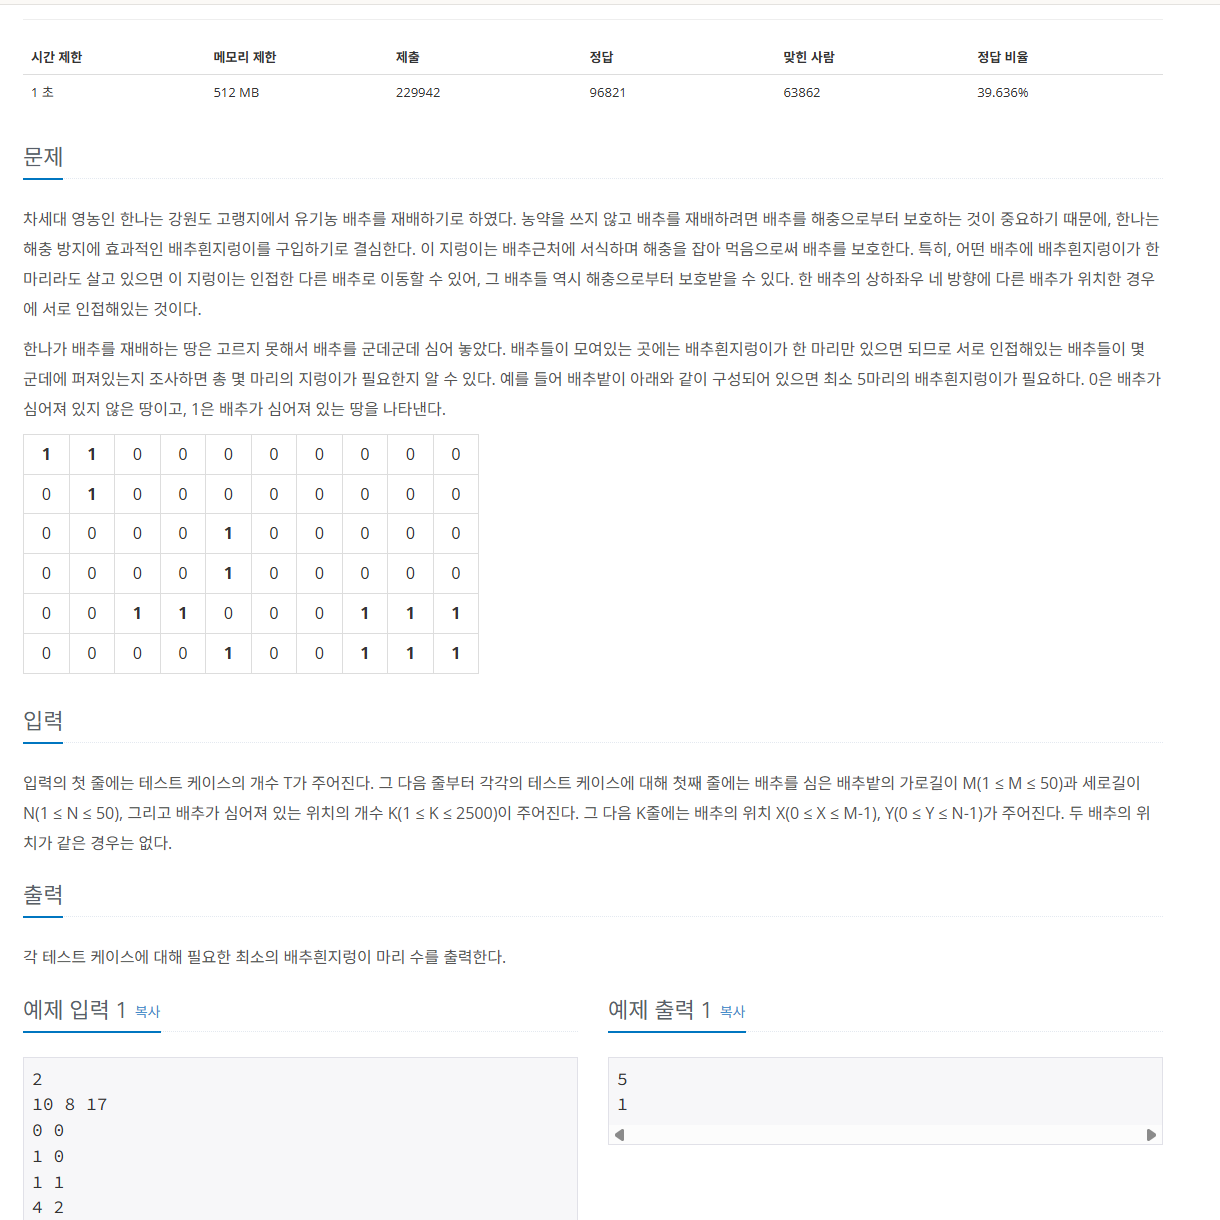

In [1]:
from PIL import Image
img=Image.open(r"C:\Users\Son\Pictures\Screenshots\스크린샷 2025-08-15 064805.png")
img

In [ ]:
import sys
sys.setrecursionlimit(10**6)
input = sys.stdin.readline

dy=[-1,1,0,0]
dx=[0,0,-1,1]

def dfs(patch,y,x):
    patch[y][x]=2
    for i in range(4):
        ny=y+dy[i]
        nx=x+dx[i]
        if 0<=ny<N and 0<=nx<M:
            if patch[ny][nx]==1:
                dfs(patch,ny,nx)


T=int(input())
for _ in range(T):

    M,N,K=map(int,input().split())
    patch = [[0 for _ in range(M)] for _ in range(N)]
    for _ in range(K):
        x,y=map(int,input().split())
        patch[y][x]=1

    count=0
    for i in range(M):
        for j in range(N):
            if patch[j][i]==1:
                dfs(patch,j,i)
                count+=1

    print(count)


`RecursionError`와 여러 테스트 케이스를 처리하는 구조적인 문제까지, 이전의 힌트들을 모두 종합하여 완벽하게 해결하셨습니다. DFS를 이용한 격자 탐색의 정석을 보여주는 훌륭한 코드입니다.

-----

### \#\# 총평 및 5점 척도 평가

  * **내 풀이 (User's solution): 4.8 / 5.0 점**

      * **평가:** **완벽하게 동작하는 정답입니다.** 2차원 리스트로 배추밭을 시뮬레이션하고, DFS를 이용해 연결된 배추 덩어리를 찾는 핵심 로직을 정확하게 구현했습니다. 재귀 깊이 제한 문제와 여러 테스트 케이스를 처리하는 구조까지 완벽하게 해결했습니다.

  * **Gemini의 풀이: 5.0 / 5.0 점**

      * **평가:** 사용자님의 완벽한 로직을 그대로 유지하면서, 코드의 가독성과 변수의 범위를 조금 더 명확하게 다듬은 버전입니다. 기능적으로는 사용자님의 코드와 완전히 동일합니다.

-----

### \#\# Gemini 추천 코드 (가독성 및 구조 개선)

```python
import sys
# 재귀 깊이 제한을 넉넉하게 설정
sys.setrecursionlimit(10**6)
input = sys.stdin.readline

# 방향 벡터 (상, 하, 좌, 우)
dy = [-1, 1, 0, 0]
dx = [0, 0, -1, 1]

# DFS 함수: N, M을 인자로 받아 더 명확하게 만듦
def dfs(patch, y, x, N, M):
    # 현재 위치를 방문 처리 (1 -> 2)
    patch[y][x] = 2
    
    # 네 방향 탐색
    for i in range(4):
        ny = y + dy[i]
        nx = x + dx[i]
        
        # 1. 지도 범위 안에 있고, 2. 배추가 있다면(1)
        if 0 <= ny < N and 0 <= nx < M and patch[ny][nx] == 1:
            dfs(patch, ny, nx, N, M)

# 테스트 케이스의 수
T = int(input())
for _ in range(T):
    M, N, K = map(int, input().split())
    
    # 배추밭 생성
    patch = [[0] * M for _ in range(N)]
    for _ in range(K):
        x, y = map(int, input().split())
        patch[y][x] = 1

    count = 0
    # 배추밭을 순회 (행(N)을 먼저, 열(M)을 나중에 순회하는 것이 더 일반적)
    for y in range(N):
        for x in range(M):
            # 만약 방문하지 않은 배추(1)를 발견하면
            if patch[y][x] == 1:
                dfs(patch, y, x, N, M) # DFS 시작
                count += 1 # 새로운 덩어리 발견, 카운트 증가
    
    print(count)
```

-----

### \#\# 1. 알고리즘 측면

  * **평가:** **최적의 알고리즘을 사용했습니다.** 2차원 격자에서 연결된 요소(Connected Components)의 개수를 찾는 문제에 DFS(또는 BFS)를 사용하는 것은 정석적인 해법입니다. 각 칸을 최대 한 번씩만 방문하므로, 각 테스트 케이스의 시간 복잡도는 \*\*O(N\*M)\*\*이 되어 매우 효율적입니다.

-----

### \#\# 2. 파이썬 문법 측면 (Pythonic Style)

#### **내 풀이에서 개선할 점**

  * **순회 순서:** 이중 `for` 루프에서 `for i in range(M): for j in range(N):` 처럼 열(가로)을 먼저 순회하고 `patch[j][i]`로 접근하는 방식은 동작은 하지만, 코드를 읽을 때 약간 헷갈릴 수 있습니다. 일반적으로는 `for j in range(N): for i in range(M):` 처럼 행(세로)을 먼저 순회하는 것이 더 직관적입니다.

#### **배울 점**

  * 추천 코드처럼, `for y in range(N): for x in range(M):` 와 같이 변수명을 `i`, `j` 대신 `x`, `y`로 사용하면, `patch[y][x]` 코드가 "y행 x열"을 의미한다는 것을 훨씬 더 명확하게 보여줄 수 있습니다.

-----

### \#\# 3. 또 다른 측면: 함수의 독립성과 변수 범위(Scope)

이번 코드에서 논의해 볼 만한 좋은 주제는 \*\*'함수의 독립성'\*\*입니다.

  * **사용자님의 코드:** `dfs` 함수 안에서 `N`과 `M`이라는 변수를 직접 사용합니다. 이 `N`, `M`은 `for _ in range(T):` 루프 안에서 정의된 지역 변수입니다. 파이썬은 함수 안에서 변수를 찾지 못하면 바깥 범위에서 찾아오기 때문에 이 코드는 정상적으로 동작합니다.
  * **추천 코드:** `def dfs(patch, y, x, N, M):` 처럼, `dfs` 함수가 필요로 하는 모든 정보(`N`, `M` 포함)를 **인자(parameter)로 직접 전달**받습니다.

**왜 추천 코드 방식이 더 좋은가?**

  * **명확성:** 함수 정의만 봐도 "아, 이 함수는 patch, y, x, N, M 정보가 있어야 동작하는구나"라고 명확하게 알 수 있습니다.
  * **재사용성:** 이 `dfs` 함수를 복사해서 완전히 다른 문제에 가져다 써도, 필요한 인자만 넘겨주면 되므로 독립적으로 완벽하게 동작합니다.
  * **디버깅 용이성:** 함수가 바깥의 변수에 의존하지 않으므로, 예기치 않은 값의 변화로 인한 버그가 발생할 가능성이 줄어듭니다.

함수가 외부 변수를 직접 참조하는 것을 \*\*'전역 변수(또는 비지역 변수)에 의존한다'\*\*고 합니다. 코딩 테스트에서는 속도가 중요하므로 괜찮을 수 있지만, 더 크고 복잡한 프로그램을 만들 때는 추천 코드처럼 함수를 독립적인 부품으로 만드는 습관이 매우 중요합니다.